## Requirements
- Submit to **eeclass** with your **code file** ```Lab05_{student_id}.ipynb``` (e.g. ```Lab05_109069999.ipynb```) and **prediction file** ```Lab05_{student_id}_y_pred.csv```. The notebook should contain the following parts:
    1. Use all features to train **[any linear model in scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#linear-models)** and try different hyperparameters (ex. different degree, complexity). Show their performances.
    2. Select 1 setting (model + hyperparameters) and plot the **error curve** to show that the setting you selected **isn't over-fit**.
    3. Use any method to choose the **best 3 features** that can best aid the model's prediction. Explain **how you find it**.
        - Note: the combination of features doesn't count as 1 feature, e.g. $x_1, x_2,$ and $x_1^2+x_2$ count as only two features.
    4. Train the model selected in 2. with the only 3 features selected in 3., and present the training error.
    5. Export the predictions of the model trained in 4. for `X_test` (follow the format of `y_train.csv`).
    6. A **brief report** of what you have done in this assignment.
- Prediction performance will have minimal impact on the assignment grade, so there's no need to be overly concerned about it.
- Deadline: **2023-10-2 (Wed) 23:59**.

In [1]:
# download the dataset
import os

import urllib.request
import pandas as pd
import numpy as np


if not os.path.exists('data/'):
    os.makedirs('data/')

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

raw_X_train = pd.read_csv('./data/X_train.csv')
raw_y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')

In [2]:
# split the dataset
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    raw_X_train, raw_y_train, test_size=0.3, random_state=0)

In [3]:
# try logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
    
regr = LogisticRegression(n_jobs=64)
regr = regr.fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
y_valid_pred = regr.predict(X_valid)
    
print('error rate train: %.4f, valid: %.4f' % (
                    1-accuracy_score(y_train, y_train_pred),
                    1-accuracy_score(y_valid, y_valid_pred)))  


/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


error rate train: 0.3918, valid: 0.3914


/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
# try ridge regression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
    
regr = RidgeClassifier()
regr = regr.fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
y_valid_pred = regr.predict(X_valid)
    
print('error rate train: %.4f, valid: %.4f' % (
                    1-accuracy_score(y_train, y_train_pred),
                    1-accuracy_score(y_valid, y_valid_pred)))  

error rate train: 0.3920, valid: 0.3903


/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## ridge regression better than logistic regression

/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.269

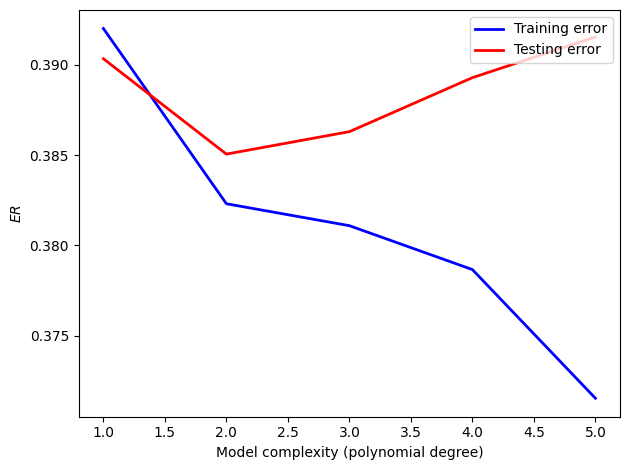

In [5]:
# try ridge classifier with polynomial features
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
from tqdm import tqdm

max_degree = 6
er_train = []
er_valid = []

for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)
    
    regr = RidgeClassifier()
    regr = regr.fit(X_train_poly, y_train)
    y_train_pred = regr.predict(X_train_poly)
    y_valid_pred = regr.predict(X_valid_poly)
    
    er_train.append(1-accuracy_score(y_train, y_train_pred))
    er_valid.append(1-accuracy_score(y_valid, y_valid_pred))

plt.plot(range(1, max_degree), er_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), er_valid, label = 'Testing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$ER$')
plt.tight_layout()
plt.savefig('./output/fig-error-curve-ridge-classifier.png', dpi=300)
plt.show()

## degree=2 is best

In [6]:
# test best alpha
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)

for a in [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    regr = RidgeClassifier(alpha=a)
    regr = regr.fit(X_train_poly, y_train)
    y_train_pred = regr.predict(X_train_poly)
    y_valid_pred = regr.predict(X_valid_poly)
    
    print('\n[Alpha = %.4f]' % a )
    print('ER train: %.4f, valid: %.4f' % (
                    1-accuracy_score(y_train, y_train_pred),
                    1-accuracy_score(y_valid, y_valid_pred)))  

/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[Alpha = 0.0000]
ER train: 0.3822, valid: 0.3857

[Alpha = 0.0010]
ER train: 0.3823, valid: 0.3851

[Alpha = 0.0100]


/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.09778e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.09777e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

ER train: 0.3823, valid: 0.3851

[Alpha = 0.1000]
ER train: 0.3823, valid: 0.3851

[Alpha = 1.0000]
ER train: 0.3823, valid: 0.3851


/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[Alpha = 10.0000]
ER train: 0.3823, valid: 0.3851

[Alpha = 100.0000]
ER train: 0.3821, valid: 0.3854

[Alpha = 1000.0000]
ER train: 0.3824, valid: 0.3858


/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## alpha=0.001 is enought

/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.56293e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.32979e-18): result may not be accurate.
 

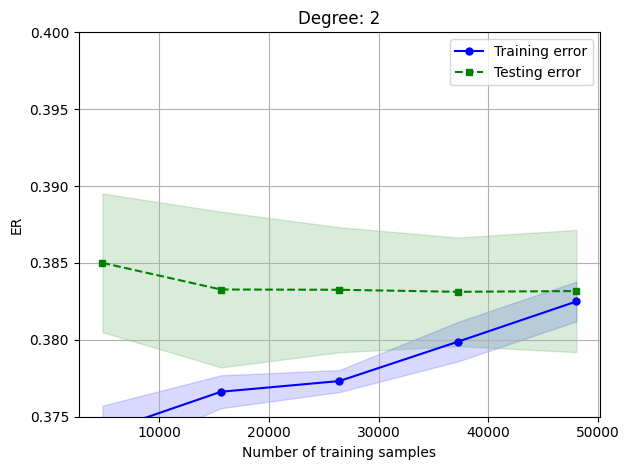

In [7]:
from sklearn.model_selection import learning_curve
def error_rate(model, X, y):
    return 1-accuracy_score(y, model.predict(X))

lr = RidgeClassifier(alpha=0.001)
train_sizes, train_scores, test_scores = learning_curve(estimator=lr, X=X_train_poly, y=y_train, scoring=error_rate)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5,
    label='Training error')
plt.fill_between(train_sizes,
    train_mean+train_std,
    train_mean-train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Testing error')
plt.fill_between(train_sizes,
    test_mean+test_std,
    test_mean-test_std,
    alpha=0.15, color='green')

# plt.hlines(y=, xmin=300, xmax=80000, color='red', linewidth=2, linestyle='--')

plt.title('Degree: %d' % 2)
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('ER')
plt.legend(loc='upper right')
plt.ylim([0.375, 0.4])
plt.tight_layout()
plt.savefig('./output/fig-learning-curve-%d.png' % 2, dpi=300)
plt.show()

## no overfit when the data is close to a certain amount

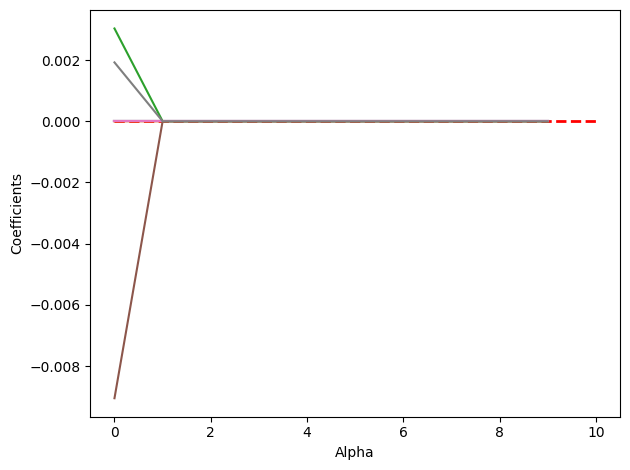

In [8]:
from sklearn.linear_model import Lasso

max_alpha = 10
coef_ = np.zeros((max_alpha,8))

for a in range(10):
    lr_rg = Lasso(alpha=a+0.1)
    lr_rg.fit(X_train, y_train)

    y_train_pred = lr_rg.predict(X_train)
    y_valid_pred = lr_rg.predict(X_valid)
    coef_[a,:] = lr_rg.coef_.reshape(1,-1)
    
plt.hlines(y=0, xmin=0, xmax=max_alpha, color='red', linewidth = 2, linestyle = '--')

for i in range(8):
    plt.plot(range(max_alpha),coef_[:,i])
    
plt.ylabel('Coefficients')
plt.xlabel('Alpha')
plt.tight_layout()
plt.savefig('./output/fig-ridge-decay.png', dpi=300)
plt.show()

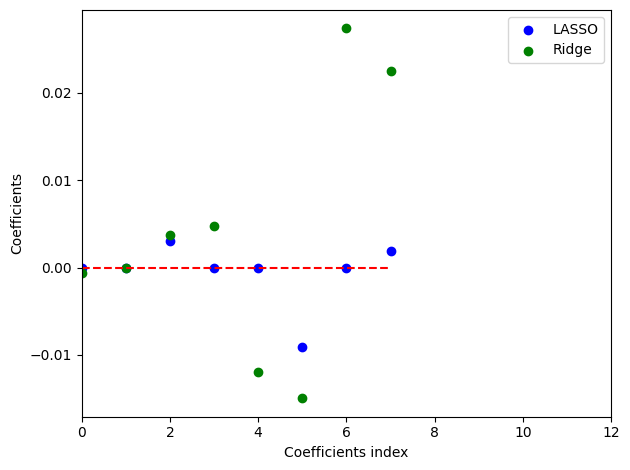

Selected attributes: ['SHOT_CLOCK' 'SHOT_DIST' 'CLOSE_DEF_DIST']


In [9]:
from sklearn.linear_model import Ridge

var_num = X_train.shape[1]

lr_lasso = Lasso(alpha = 0.1)
lr_lasso.fit(X_train, y_train)
lr_ridge = Ridge(alpha = 0.1)
lr_ridge.fit(X_train, y_train)

plt.scatter(range(var_num),lr_lasso.coef_, label = 'LASSO', color = 'blue')
plt.scatter(range(var_num),lr_ridge.coef_, label = 'Ridge', color = 'green')
plt.hlines(y=0, xmin=0, xmax=var_num-1, color='red', linestyle ='--')
plt.xlim(0,12)
plt.legend(loc = 'upper right')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()

epsilon = 1e-4
idxs = np.where(abs(lr_lasso.coef_) > epsilon)
print('Selected attributes: {}'.format(X_train.columns.values[idxs]))

## use Lasso find three feature ['SHOT_CLOCK' 'SHOT_DIST' 'CLOSE_DEF_DIST']

In [10]:
# use three selected features to train the model

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train[X_train.columns.values[idxs]])
X_valid_poly = poly.transform(X_valid[X_train.columns.values[idxs]])
    
regr = RidgeClassifier(alpha=0.001)
regr = regr.fit(X_train_poly, y_train)
y_train_pred = regr.predict(X_train_poly)
y_valid_pred = regr.predict(X_valid_poly)
    
er_train.append(1-accuracy_score(y_train, y_train_pred))
er_valid.append(1-accuracy_score(y_valid, y_valid_pred))

print('error rate train: %.4f, valid: %.4f' % ( 1-accuracy_score(y_train, y_train_pred), 1-accuracy_score(y_valid, y_valid_pred)))

error rate train: 0.3863, valid: 0.3877


/home/wayne/NTHU-CS5656/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
# use test data to predict
X_test_poly = poly.transform(X_test[X_train.columns.values[idxs]])
y_test_pred = regr.predict(X_test_poly)

# save the prediction to a csv file
pd.DataFrame(y_test_pred).to_csv('./Lab05_113062594_y_pred.csv', header=['FGM'], index=False)